In [1]:
from bcd.utils import full_train_test

In [2]:
N_TRAIN_SAMPLES = 3000
N_VALI_SAMPLES = 1000
N_ITER = 2
N_EPOCHS =10
BATCH_SIZE = 500

Iteration 1
Iteration 2


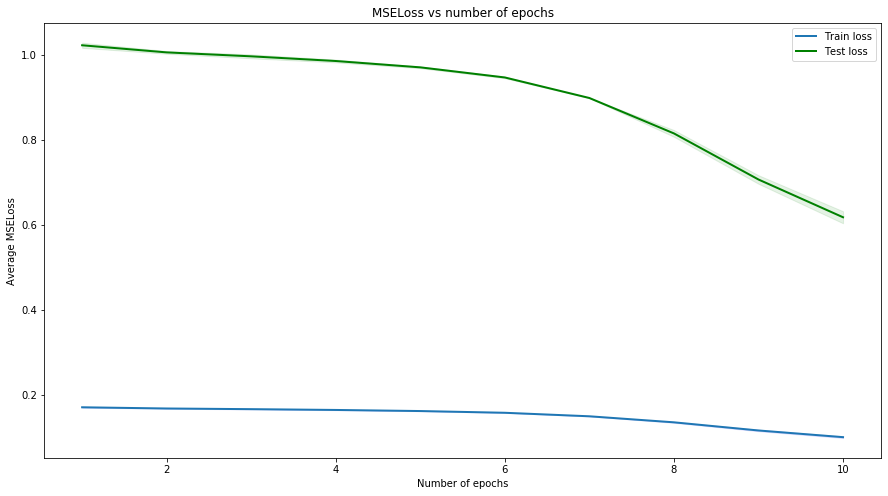

Test accuracy mean = 0.7657499999999999


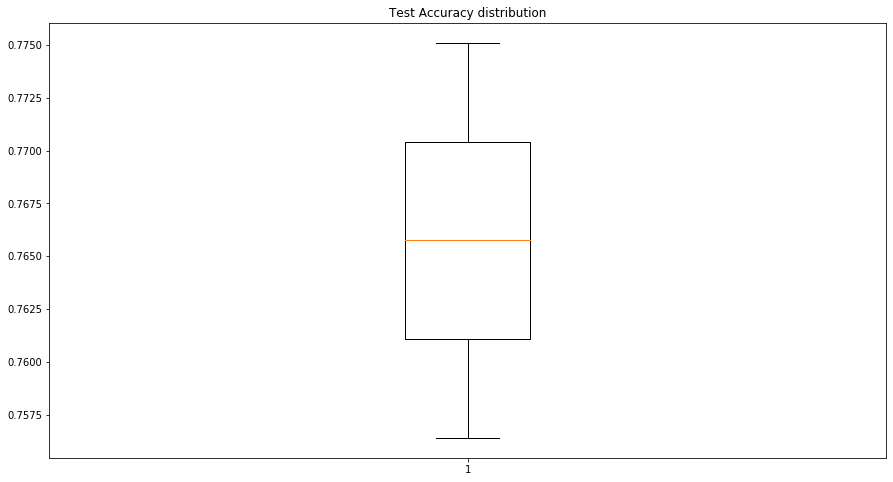

Accuracy: 0.766 +/- 0.009
Iteration time:  49.448 +/- 0.513 seconds


In [3]:
full_train_test("DFW",N_TRAIN_SAMPLES, N_VALI_SAMPLES, N_ITER, N_EPOCHS, BATCH_SIZE)

Iteration 1
Iteration 2


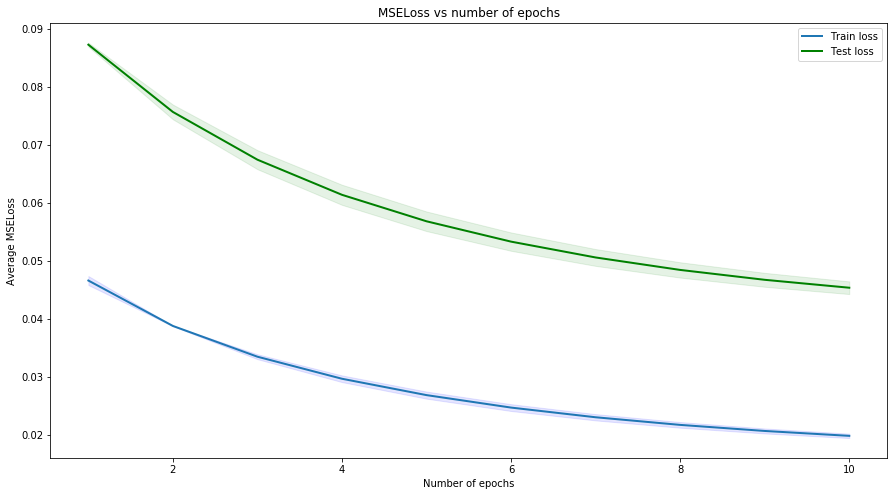

Test accuracy mean = 0.829


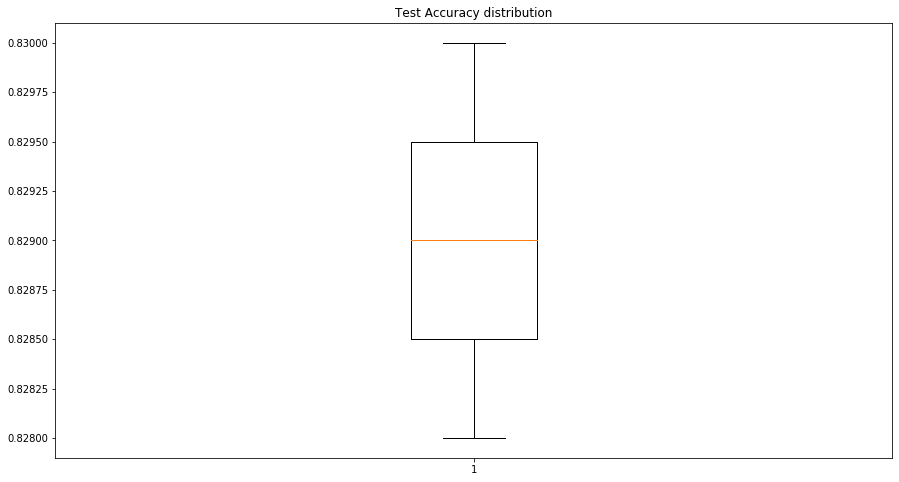

Accuracy: 0.829 +/- 0.001
Iteration time:  4.721 +/- 0.016 seconds


In [4]:
full_train_test("BCD",N_TRAIN_SAMPLES, N_VALI_SAMPLES, N_ITER, N_EPOCHS)